In [ ]:




try:
    # Check R version
    print("Testing R connection...")
    r_version = r("version")
    print("R connection successful!")
    print(r_version)
except Exception as e:
    print("Failed to connect to R.")
    print("Error:", e)

In [ ]:
import os

# Set the R_HOME and PATH environment variables
os.environ['R_HOME'] = r'C:\\Program Files\\R\\R-4.4.2'
os.environ['PATH'] += r';C:\\Program Files\\R\\R-4.4.2\\bin\\x64'

# Import rpy2 after setting environment variables
from rpy2.robjects import r

# Test the connection to R
try:
    print("Testing R connection...")
    print(r("version"))
    print("R connection successful!")
except Exception as e:
    print("Error initializing R:", e)

In [ ]:
import os
# Set the R_HOME and PATH environment variables if not already set
# Adjust to your R installation path
os.environ['R_HOME'] = r'C:\\Program Files\\R\\R-4.4.2'
# Adjust to your R bin path
os.environ['PATH'] += r';C:\\Program Files\\R\\R-4.4.2\bin\\x64'
from rpy2.robjects import r



# Create an R vector
r_vector = r('c(1, 2, 3, 4, 5)')
print("R Vector:", r_vector)



from rpy2.robjects import pandas2ri
pandas2ri.activate()

import pandas as pd
df = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})

# Convert pandas DataFrame to R data.frame
r_dataframe = pandas2ri.py2rpy(df)
print(r("summary")(r_dataframe))


from rpy2.robjects.packages import importr

ggplot2 = importr('ggplot2')
print(ggplot2.__rname__)


In [ ]:
import os

# Set R_HOME and PATH environment variables
os.environ['R_HOME'] = r'C:\\Program Files\\R\\R-4.4.2'
os.environ['PATH'] += r';C:\\Program Files\\R\\R-4.4.2\\bin\\x64'

# Import rpy2 and R libraries
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects.lib import grdevices
import IPython.display as display

# Import ggplot2
ggplot2 = importr('ggplot2')

# Create a ggplot2 object in R
r_plot = ggplot2.ggplot(r('mtcars')) + \
         ggplot2.aes_string(x='wt', y='mpg') + \
         ggplot2.geom_point() + \
         ggplot2.ggtitle("Weight vs. MPG")

# Render the plot inline in Python
with grdevices.render_to_bytesio(grdevices.png, width=800, height=600, res=300) as plot_file:
    r_plot.r_repr()
    img_data = plot_file.getvalue()
    
# Display the plot in Jupyter/IPython
display.display(display.Image(data=img_data))


In [ ]:
import os

# Set R_HOME and PATH environment variables
os.environ['R_HOME'] = r'C:\\Program Files\\R\\R-4.4.2'
os.environ['PATH'] += r';C:\\Program Files\\R\\R-4.4.2\\bin\\x64'

# Import rpy2 and R libraries
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects.lib import grdevices
import IPython.display as display

# Import ggplot2
ggplot2 = importr('ggplot2')

# Create a ggplot2 object in R
r_plot = ggplot2.ggplot(r('mtcars')) + \
         ggplot2.aes_string(x='wt', y='mpg') + \
         ggplot2.geom_point() + \
         ggplot2.ggtitle("Weight vs. MPG")

# Render the plot as a PNG image and display it inline
with grdevices.render_to_bytesio(grdevices.png, width=1200, height=900, res=300) as plot_file:
    r_plot.r_repr()  # Evaluate the R ggplot object to render the plot
    img_data = plot_file.getvalue()

# Display the plot as an inline image
display.display(display.Image(data=img_data))

In [ ]:
import os
# Set R_HOME and PATH environment variables
os.environ['R_HOME'] = r'C:\\Program Files\\R\\R-4.4.2'
os.environ['PATH'] += r';C:\\Program Files\\R\\R-4.4.2\\bin\\x64'


from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects.lib import grdevices
import IPython.display as display


# Import ggplot2
ggplot2 = importr('ggplot2')

# Create a ggplot2 plot
r_plot = ggplot2.ggplot(r('mtcars')) + \
         ggplot2.aes_string(x='wt', y='mpg') + \
         ggplot2.geom_point(size=3) + \
         ggplot2.ggtitle("Weight vs. MPG") + \
         ggplot2.theme_minimal()

# Save the plot as a PNG file
output_file = "high_quality_plot.png"
grdevices.png(file=output_file, width=1200, height=900, res=300)  # Open the graphics device
r_plot.r_repr()  # Render the ggplot2 object
grdevices.dev_off()  # Close the graphics device

# Display the saved image in Jupyter Notebook
display.display(display.Image(filename=output_file))
print(f"Image successfully saved as '{output_file}'")

In [ ]:
import os

# Set R_HOME and PATH environment variables
os.environ['R_HOME'] = r'C:\\Program Files\\R\\R-4.4.2'
os.environ['PATH'] += r';C:\\Program Files\\R\\R-4.4.2\\bin\\x64'

from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
import pandas as pd
import IPython.display as display
from rpy2.robjects.lib import grdevices

# Enable automatic conversion between pandas and R data frames
pandas2ri.activate()



# Import ggplot2
ggplot2 = importr('ggplot2')

# Step 1: Test ggplot2 with R's built-in dataset
try:
    print("Testing ggplot2 with R's built-in dataset 'mtcars'...")
    r_data = r('mtcars')  # Use R's built-in dataset
    r_plot = ggplot2.ggplot(r_data) + \
             ggplot2.aes_string(x='wt', y='mpg') + \
             ggplot2.geom_point(size=3) + \
             ggplot2.ggtitle("Scatter Plot of mtcars") + \
             ggplot2.theme_minimal()

    # Save and render the plot
    mtcars_plot_file = "mtcars_scatter_plot.png"
    grdevices.png(file=mtcars_plot_file, width=800, height=600, res=150)
    r("print")(r_plot)
    grdevices.dev_off()
    print(f"mtcars scatter plot saved as '{mtcars_plot_file}'")

    # Display the plot inline
    display.display(display.Image(filename=mtcars_plot_file))
except Exception as e:
    print("Error rendering 'mtcars' plot:", e)

# Step 2: Test ggplot2 with custom Python dataset
try:
    print("Testing ggplot2 with custom Python dataset...")
    data = pd.DataFrame({
        'x': [1, 2, 3, 4, 5, 6, 7],
        'y': [10, 20, 25, 30, 35, 40, 45]
    })

    # Debug: Check the Python DataFrame
    print("Python DataFrame:")
    print(data)

    # Convert pandas DataFrame to R data.frame
    r_data = pandas2ri.py2rpy(data)

    # Debug: Check the R data.frame
    print("Converted R data.frame:")
    print(r_data)

    # Create the plot
    r_plot = ggplot2.ggplot(r_data) + \
             ggplot2.aes_string(x='x', y='y') + \
             ggplot2.geom_point(size=3) + \
             ggplot2.ggtitle("2D Scatter Plot") + \
             ggplot2.theme_minimal()

    # Save and render the plot
    custom_plot_file = "custom_scatter_plot.png"
    grdevices.png(file=custom_plot_file, width=800, height=600, res=150)
    r("print")(r_plot)
    grdevices.dev_off()
    print(f"Custom scatter plot saved as '{custom_plot_file}'")

    # Display the plot inline
    display.display(display.Image(filename=custom_plot_file))
except Exception as e:
    print("Error rendering custom plot:", e)

# Step 3: Backup solution to save the plot directly in R
try:
    print("Testing direct R plotting...")
    r_code = """
    library(ggplot2)
    data <- data.frame(x=c(1, 2, 3, 4, 5, 6, 7), y=c(10, 20, 25, 30, 35, 40, 45))
    p <- ggplot(data, aes(x=x, y=y)) + geom_point() + ggtitle("Backup 2D Scatter Plot") + theme_minimal()
    ggsave("backup_scatter_plot.png", plot=p, width=8, height=6, dpi=150)
    """
    r(r_code)
    print("Backup scatter plot saved as 'backup_scatter_plot.png'")
except Exception as e:
    print("Error rendering backup plot:", e)

# Step 4: Display R environment and ggplot2 version for debugging
try:
    print("R Environment:")
    print(r("version"))
    print("ggplot2 version:")
    print(r("packageVersion('ggplot2')"))
except Exception as e:
    print("Error checking R environment:", e)


Executing direct R code via rpy2 with improved colors...
Plot saved as 'improved_r_plot.png'


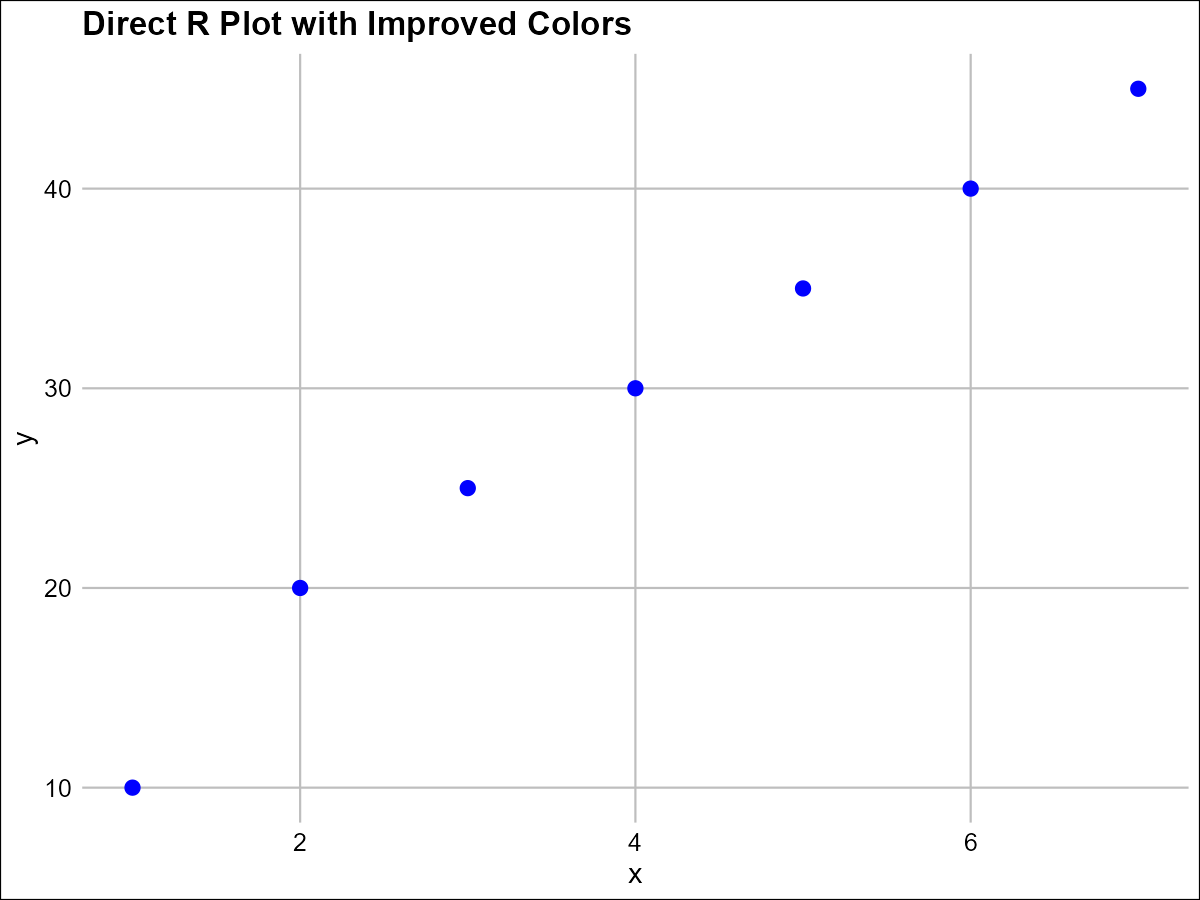

R Environment:
               _                                
platform       x86_64-w64-mingw32               
arch           x86_64                           
os             mingw32                          
crt            ucrt                             
system         x86_64, mingw32                  
status                                          
major          4                                
minor          4.2                              
year           2024                             
month          10                               
day            31                               
svn rev        87279                            
language       R                                
version.string R version 4.4.2 (2024-10-31 ucrt)
nickname       Pile of Leaves                   

ggplot2 Version:
[1] '3.5.1'



In [6]:
# Step 1: Set R_HOME and PATH
import os
os.environ['R_HOME'] = r'C:\\Program Files\\R\\R-4.4.2'
os.environ['PATH'] += r';C:\\Program Files\\R\\R-4.4.2\\bin\\x64'

from rpy2.robjects import r
import IPython.display as display

# Step 2: Directly Execute R Code with Customization
try:
    print("Executing direct R code via rpy2 with improved colors...")
    r_code = """
    library(ggplot2)
    # Generate data in R
    data <- data.frame(x=c(1, 2, 3, 4, 5, 6, 7), y=c(10, 20, 25, 30, 35, 40, 45))
    # Create ggplot2 object with improved theme
    p <- ggplot(data, aes(x=x, y=y)) + 
        geom_point(size=3, color='blue') + 
        ggtitle("Direct R Plot with Improved Colors") + 
        theme_minimal() +
        theme(
            plot.background = element_rect(fill = "white", color = "black"),
            panel.grid.major = element_line(color = "grey"),
            panel.grid.minor = element_blank(),
            axis.text = element_text(size = 12, color = "black"),
            axis.title = element_text(size = 14, color = "black"),
            plot.title = element_text(size = 16, face = "bold", color = "black")
        )
    # Save the plot
    ggsave("improved_r_plot.png", plot=p, width=8, height=6, dpi=150)
    """
    r(r_code)
    print("Plot saved as 'improved_r_plot.png'")
    
    # Step 3: Display the saved plot inline
    display.display(display.Image(filename="improved_r_plot.png"))
except Exception as e:
    print("Error executing R code:", e)

# Step 4: Verify R Environment
try:
    print("R Environment:")
    print(r("version"))
    print("ggplot2 Version:")
    print(r("packageVersion('ggplot2')"))
except Exception as e:
    print("Error checking R environment:", e)
